In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,450.0
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,325.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,NaN,New Property,NaN,NaN,595.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,297.5
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,NaN,Undefined,NaN,NaN,1200.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0,600.0
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,NaN,Under Construction,1345.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,672.5


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1014
agePossession             0
super_built_up_area    1683
built_up_area          1970
carpet_area            1717
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score            110
area_room_ratio           0
dtype: int64

# Built up area

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

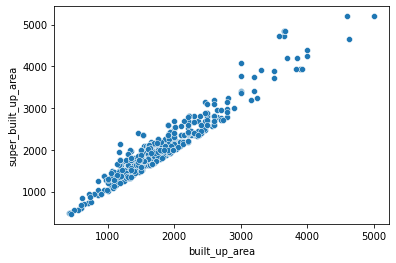

In [6]:
sns.scatterplot(df['built_up_area'],df['super_built_up_area'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='built_up_area', ylabel='carpet_area'>

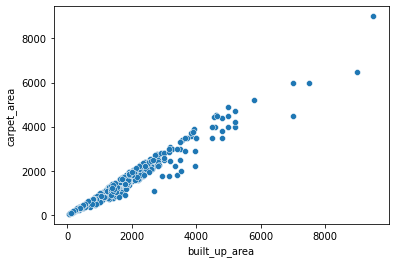

In [7]:
sns.scatterplot(df['built_up_area'],df['carpet_area'])

In [8]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3554    False
3555    False
3556    False
3557    False
3558    False
Length: 3559, dtype: bool

In [9]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]


In [10]:
all_present_df.shape

(531, 24)

In [11]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [12]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [13]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [14]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]


In [15]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
30,flat,bhawna cghs,sector 43,3.25,10156.0,3200.0,Super Built up area 3200(297.29 sq.m.)Carpet a...,4.0,4.0,3+,12.0,NaN,Moderately Old,3200.0,NaN,3000.0,0.0,0.0,0.0,1.0,0.0,0.0,119.0,800.000000
35,flat,chintels paradiso,sector 109,1.80,8866.0,2030.0,Super Built up area 2030(188.59 sq.m.)Carpet a...,3.0,3.0,2,0.0,East,Moderately Old,2030.0,NaN,1785.0,0.0,1.0,0.0,0.0,0.0,1.0,83.0,676.666667
36,flat,breez global hill view,sohna road,0.30,5403.0,555.0,Super Built up area 655(60.85 sq.m.)Carpet are...,2.0,2.0,2,6.0,North-East,New Property,655.0,NaN,555.0,0.0,0.0,0.0,0.0,0.0,1.0,109.0,277.500000
57,flat,silverglades the melia,sohna road,1.01,7000.0,1443.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,2.0,2.0,3,12.0,NaN,Undefined,1450.0,NaN,950.0,1.0,0.0,0.0,0.0,0.0,1.0,80.0,721.500000
59,flat,umang winter hills,sector 77,0.99,7857.0,1260.0,Super Built up area 1260(117.06 sq.m.)Carpet a...,2.0,2.0,2,1.0,North,Relatively New,1260.0,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,97.0,630.000000


In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1014
agePossession             0
super_built_up_area    1683
built_up_area          1970
carpet_area            1717
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score            110
area_room_ratio           0
dtype: int64

In [18]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [19]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,NaN,Under Construction,1345.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,672.5
6,flat,the cocoon,dwarka expressway,2.00,13333.0,1500.0,Super Built up area 1500(139.35 sq.m.),3.0,3.0,3,5.0,NaN,New Property,1500.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,500.0
13,flat,godrej,sector 33,0.95,6859.0,1385.0,Super Built up area 1385(128.67 sq.m.),2.0,2.0,3+,3.0,South-East,Under Construction,1385.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,692.5
14,flat,shree vardhman flora,sector 90,0.70,5384.0,1300.0,Super Built up area 1300(120.77 sq.m.),2.0,2.0,3,13.0,NaN,New Property,1300.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,15.0,650.0
18,flat,central park flower valley,sector 33,2.20,10476.0,2100.0,Super Built up area 2100(195.1 sq.m.),3.0,3.0,3,12.0,North-East,New Property,2100.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,49.0,700.0


In [20]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
df.update(sb_df)

In [22]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1014
agePossession             0
super_built_up_area    1683
built_up_area          1094
carpet_area            1717
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score            110
area_room_ratio           0
dtype: int64

In [23]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [24]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,450.000000
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,325.000000
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,NaN,New Property,NaN,NaN,595.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,297.500000
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,NaN,Undefined,NaN,NaN,1200.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0,600.000000
7,flat,ats triumph,sector 104,1.80,7860.0,2290.0,Carpet area: 2290 (212.75 sq.m.),3.0,4.0,3,14.0,NaN,New Property,NaN,NaN,2290.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,763.333333


In [25]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [26]:
df.update(c_df)

In [27]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1014
agePossession             0
super_built_up_area    1683
built_up_area           421
carpet_area            1717
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score            110
area_room_ratio           0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='built_up_area', ylabel='price'>

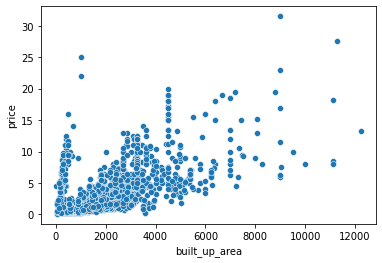

In [28]:
sns.scatterplot(df['built_up_area'],df['price'])

In [29]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [30]:
anamoly_df.sample(5)

,price,area,built_up_area
3333,6.15,2250.0,270.0
2908,11.30,4500.0,480.0
3428,2.68,1557.0,1557.0
2972,2.80,1500.0,1500.0
665,2.80,2048.0,1853.0


In [31]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [32]:
df.update(anamoly_df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='built_up_area', ylabel='price'>

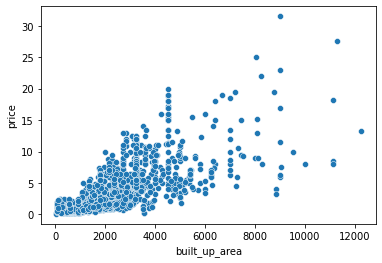

In [33]:
sns.scatterplot(df['built_up_area'],df['price'])

In [34]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [35]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,2.0,2.0,1,4.0,West,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,2.0,2.0,1,1.0,West,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,2.0,2.0,3,12.0,NaN,New Property,661.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,2.0,2.0,2,2.0,NaN,Undefined,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,2.0,2.0,3,5.0,NaN,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1014
agePossession         0
built_up_area       421
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score        110
dtype: int64

# floorNum

In [37]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
169,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2577,flat,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,1.0,103.0
2825,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2844,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2915,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2946,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0
2959,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3005,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3020,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3139,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,1.0,112.0


In [38]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [39]:
df['floorNum'].fillna(2.0,inplace=True)

In [40]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1014
agePossession         0
built_up_area       421
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score        110
dtype: int64

In [42]:
1014/df.shape[0]

0.2849114919921326

# facing

<Axes: ylabel='facing'>

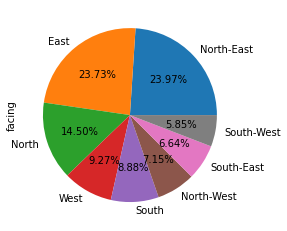

In [43]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [44]:
df.drop(columns=['facing'],inplace=True)

In [45]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
117,flat,emaar mgf palm hills,sector 77,1.50,12744.0,3.0,3.0,3,4.0,Relatively New,NaN,0.0,0.0,0.0,0.0,0.0,0.0,97.0
202,flat,eldeco accolade,sohna road,0.95,6542.0,2.0,2.0,3+,6.0,New Property,NaN,1.0,0.0,0.0,0.0,0.0,0.0,56.0
2828,house,grover homes sec 4,sector 4,4.75,9374.0,5.0,5.0,1,1.0,Old Property,5067.0,1.0,1.0,0.0,1.0,0.0,0.0,9.0
3389,house,independent,sector 43,8.50,31481.0,5.0,5.0,3,3.0,Moderately Old,2700.0,0.0,1.0,0.0,0.0,0.0,0.0,35.0
2848,house,vipul tatvam villa,sector 48,7.25,27971.0,3.0,4.0,2,2.0,Moderately Old,2592.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [46]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area      421
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score       110
dtype: int64

In [47]:
df.drop(index=[2536],inplace=True)

In [48]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area      420
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score       110
dtype: int64

# agePossession

In [49]:
df['agePossession'].value_counts()

Relatively New        1605
New Property           557
Moderately Old         545
Undefined              433
Old Property           293
Under Construction     125
Name: agePossession, dtype: int64

In [50]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,flat,smart world orchard,sector 61,1.47,12250.0,2.0,2.0,2,2.0,Undefined,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0
5,flat,signature global infinity mall,sector 36,0.41,6269.0,2.0,2.0,3,3.0,Undefined,654.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,flat,raheja revanta,sector 78,4.75,16885.0,3.0,3.0,2,31.0,Undefined,2813.0,0.0,1.0,0.0,0.0,0.0,1.0,100.0
10,flat,signature global city 81,sector 81,0.96,9767.0,2.0,2.0,2,1.0,Undefined,1194.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0
15,flat,sobha city,sector 108,3.95,16859.0,4.0,5.0,3,25.0,Undefined,2343.0,0.0,0.0,0.0,0.0,0.0,1.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,house,independent,sector 43,2.15,13030.0,1.0,1.0,0,1.0,Undefined,1650.0,0.0,0.0,0.0,0.0,0.0,1.0,128.0
3206,house,project mianwali colony,sector 12,2.00,14815.0,5.0,5.0,2,3.0,Undefined,1350.0,0.0,0.0,0.0,0.0,0.0,1.0,160.0
3305,house,smart world orchard,sector 61,2.01,13000.0,3.0,3.0,3,4.0,Undefined,1549.0,0.0,0.0,0.0,0.0,0.0,1.0,145.0
3325,house,dlf floors phase 3,sector 24,3.51,12342.0,4.0,4.0,3,4.0,Undefined,2844.0,1.0,1.0,1.0,1.0,0.0,0.0,153.0


In [51]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [52]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [53]:
df['agePossession'].value_counts()

Relatively New        1783
New Property           635
Moderately Old         586
Old Property           331
Under Construction     127
Undefined               96
Name: agePossession, dtype: int64

In [54]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [55]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [56]:
df['agePossession'].value_counts()

Relatively New        1799
New Property           658
Moderately Old         593
Old Property           342
Under Construction     127
Undefined               39
Name: agePossession, dtype: int64

In [57]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [58]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [59]:
df['agePossession'].value_counts()

Relatively New        1815
New Property           658
Moderately Old         616
Old Property           342
Under Construction     127
Name: agePossession, dtype: int64

In [60]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
built_up_area      420
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score       110
dtype: int64

In [61]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)